In [1]:
from sentm import complexitext
import pandas as pd
import spacy
import lemmy
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [26]:
lemma_table = complexitext._read_lemma_table()
lemma_table = lemma_table.dropna(subset="lemma")

In [27]:
lemma_table["word_length"] = lemma_table["lemma"].apply(len)

In [28]:
lemma_table.sort_values("word_length")

,pos,lemma,freq,word_length
0,T,i,3.224048e-02,1
13234,NC,Y,2.362455e-06,1
18642,D,5,1.357439e-06,1
25249,NC,D,8.215785e-07,1
19775,NC,H,1.235147e-06,1
...,...,...,...,...
253770,NC,ejendomsadministrationsvirksomhed,7.782205e-09,33
274630,NC,forbrugerforventningsundersøgelse,6.670461e-09,33
116970,NC,medarbejdertilfredshedsundersøgelse,4.002277e-08,35
207450,T,professortiltrædelsesforelæsningfor,1.222918e-08,35


In [3]:
lemma_table.pos.value_counts()

NC    238327
A      25772
V      25601
D       3264
T       2186
P       2004
AW      1161
C        693
I        393
U        165
EW       135
DW       115
VW        96
IW        56
TW        19
PW        13
Name: pos, dtype: int64

In [4]:
lemma_table[lemma_table.pos == "U"]

,pos,lemma,freq
8,U,at,1.450994e-02
12,U,der,1.289033e-02
15,U,som,9.942140e-03
33715,U,alexander,4.869437e-07
35461,U,tilat,4.446974e-07
...,...,...,...
298113,U,begyndeat,5.558718e-09
298237,U,beskrevetsom,5.558718e-09
299333,U,bådesom,5.558718e-09
299455,U,børnsom,5.558718e-09


In [5]:
lemma_table[lemma_table.lemma == "at"]

,pos,lemma,freq
8,U,at,0.014510
13,C,at,0.011289


In [112]:
df.dropna()

,Tag,POS,Example,Ex-list
0,A,adjective,god,•
1,C,conjunction,og,•
2,D,adverb,ud,•
3,EW,POW lex.item,anti@,•
4,I,interjection,ja,•
8,NC,common noun,år,•
11,P,pronoun,den,•
12,T,preposition,i,•
13,U,unique,"at, som, der",•
14,V,verb,være,•


In [ ]:
{
    "ADJ" : "A" ,
    "CCONJ" : "C" ,
    "SCONJ" : "C" ,
    "ADV" : "D" ,
    "NOUN" : "NC",
    "PRON" : "P" ,
    "ADP" : "T" ,
    "VERB" : "V" ,
    
}

In [138]:
import spacy
import lemmy

In [139]:
lemmatizer = lemmy.load("da")

In [141]:
lemmatizer.lemmatize("", "som")

['som']

In [134]:
spacy_pipeline = spacy.load("da_core_news_sm")

In [153]:
doc = spacy_pipeline("At være eller ikke at være")
[(token.text, token.pos_) for token in doc]

[('At', 'PART'),
 ('være', 'AUX'),
 ('eller', 'CCONJ'),
 ('ikke', 'ADV'),
 ('at', 'PART'),
 ('være', 'AUX')]

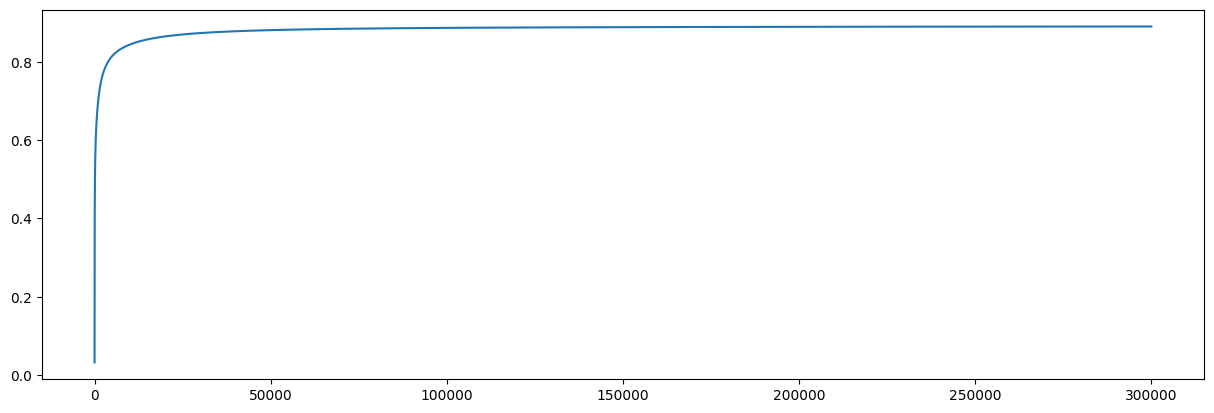

In [6]:
ax = lemma_table.freq.cumsum().plot()

fig = ax.get_figure()

fig.set_figwidth(15)

In [8]:
lemma_table.freq#.hist(bins=100);

0         3.224048e-02
1         3.093546e-02
2         2.960070e-02
3         2.535859e-02
4         2.485305e-02
              ...     
299995    5.558718e-09
299996    5.558718e-09
299997    5.558718e-09
299998    5.558718e-09
299999    5.558718e-09
Name: freq, Length: 300000, dtype: float64

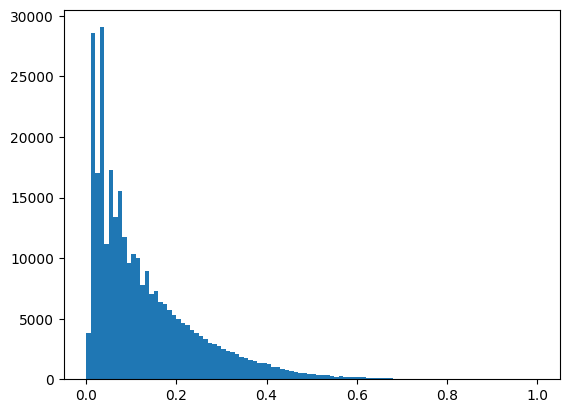

In [104]:
d = complexitext._min_max_scale(np.log(lemma_table.freq))
plt.hist(d, bins=100);

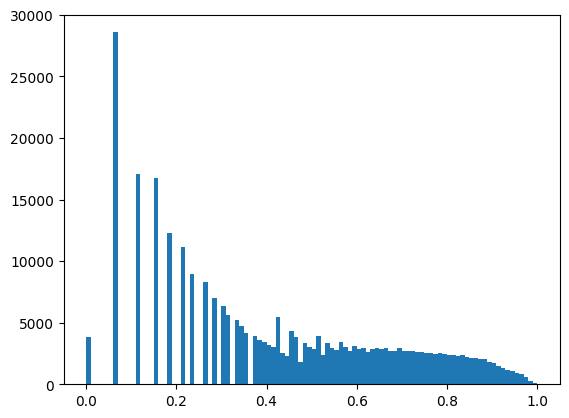

In [73]:
fitted_data, fitted_lambda = stats.boxcox(lemma_table.freq)
fitted_data = complexitext._min_max_scale(fitted_data)
plt.hist(fitted_data, bins=100);

In [76]:
fitted_data[:100]

array([1.        , 0.99993348, 0.99986143, 0.99959987, 0.99956478,
       0.99864363, 0.99863186, 0.99856384, 0.99853056, 0.99848018,
       0.99847031, 0.99828298, 0.99827613, 0.99797842, 0.99797141,
       0.99768004, 0.99750498, 0.996721  , 0.99653889, 0.9965308 ,
       0.99639716, 0.99631449, 0.99617705, 0.99613626, 0.99593841,
       0.99570301, 0.99556199, 0.99527899, 0.99527689, 0.99523007,
       0.99521526, 0.99521293, 0.99495846, 0.9948645 , 0.9947227 ,
       0.99443818, 0.99425407, 0.9942262 , 0.99407586, 0.99399394,
       0.99392511, 0.99380352, 0.99374936, 0.99368731, 0.99331616,
       0.99293382, 0.99283219, 0.99282554, 0.99272034, 0.99268893,
       0.992686  , 0.99264571, 0.9926386 , 0.99252148, 0.9924789 ,
       0.9924065 , 0.99225529, 0.9922042 , 0.99216668, 0.99201734,
       0.99197671, 0.99196086, 0.99183774, 0.99146001, 0.99144028,
       0.99112758, 0.99107599, 0.9908765 , 0.99079704, 0.99066956,
       0.99063818, 0.99053551, 0.99041463, 0.99035463, 0.99029

In [2]:
lemmatizer = lemmy.load("da")
spacy_pipeline = spacy.load("da_core_news_sm")

In [9]:
# Specify your text
text = "dette er en test hahahaaa i"

# Create POS (optional)
doc = spacy_pipeline(text)

# Get lemmas for text (mandatory)
lemmas = [lemmatizer.lemmatize(token.pos_, token.text)[0] for token in doc]

# Extract frequencies
freqs = [complexitext.get_lemma_freq(lemma) for lemma in lemmas]

# Compute complexity as a mean of inverse frequencies
complexity_score = np.mean([1 - freq for freq in freqs if freq])
print(complexity_score)

0.4395794733371865


In [12]:
text = "dette er en test hahahaaa i"

In [16]:
tokens = text.split()

len(tokens), np.mean([len(token) for token in tokens])

(6, 3.6666666666666665)